In [1]:
# General modules
import sys
import os
import os.path
from pathlib import Path # creating directories

# math modules
import numpy as np
import tensorflow as tf # used for random seed
## math random seed module
import random as python_random

# load data
from training_modules.load_data import DATA_LOADER
# handling files
from training_modules.handling_saving_stats import get_file_path, save_history, calc_tst_acc, calc_advantage, save_file, display_results
# ## constants for DB_TYPE
from training_modules.misc import TYPE_ASCAD, TYPE_NTRU, TYPE_GAUSS, TYPE_DPA, TYPE_M4SC
# ## constants for handling file types
from training_modules.misc import MODEL_CONST, LOSS_CONST, ACC_CONST, ADV_CONST, TRN_GRPH_CONST, ADV_GRPH_CONST, TST_ACC_CONST, VAL_LOSS_CONST, VAL_ACC_CONST, VAL_ADV_CONST, TST_ADV_CONST
# ## hyper parameters
from hyper_parameters import my_seeds, tot
# training:
from training_modules.train import train_model


/home/gharra/chipWhisp01/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/gharra/chipWhisp01/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/gharra/chipWhisp01/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/gharra/chipWhisp01/venv/lib/python3.6/site-packages/ten

In [2]:
# prepare
models = dict()

# define empty history object
history = dict()

In [3]:
def read_parameters_from_file(param_filename):
    #read parameters for the train_model and load_traces functions
    #TODO: sanity checks on parameters
    param_file = open(param_filename,"r")

    #TODO: replace eval() by ast.linear_eval()
    my_parameters= eval(param_file.read())

    my_database = my_parameters["database"]
    my_database_title = my_parameters["database_title"]
    return my_database_title, my_database


+ Commense training (takes about 20 seconds per epoch)
+ Commense loading data
++ Loading schoolbook on m4sc data
++ Parse m4sc data
++ Finished parsing m4sc data
++ Normalizing traces of m4sc
++ Organizing traces
++ Data dimestions are:  (10000, 7000)
+ sample 0 traces
key_idx=0...

Train on 8955 samples, validate on 995 samples
Epoch 1/2
8955/8955 [==============================] - 1s 66us/step - loss: 1.4733 - accuracy: 0.2396 - val_loss: 1.3858 - val_accuracy: 0.2623
Epoch 2/2
8955/8955 [==============================] - 0s 54us/step - loss: 1.3952 - accuracy: 0.2468 - val_loss: 1.3863 - val_accuracy: 0.2492
+ save history
++ Saving:  ../debugging_file/trn_loss/trn_lss_s634253_k00.npy
++ Saving:  ../debugging_file/trn_accuracy/trn_acc_s634253_k00.npy
++ Saving:  ../debugging_file/graphs/trn_grph_s634253_k00.png
++ calculating accuracy for seed 634253 and key 0
key_idx=1...
Train on 8955 samples, validate on 995 samples
Epoch 1/2
8955/8955 [==============================] - 1s 67us/

<Figure size 432x288 with 0 Axes>

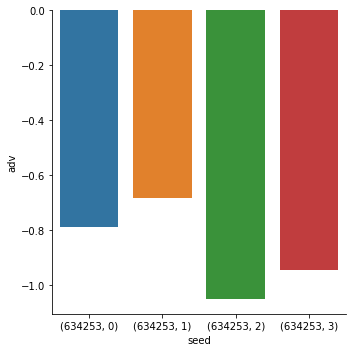

In [4]:
#ASCAD: Adapted heavily by Mahmoud Gharra

# NOTE: code could take another database if it has  supported format as the one provided.


# if __name__ == "__main__":

# default parameters values
# # my_database = "../2020_APR_23/polymul32/projects/operand_scanning_32" # Loc on my personal pc
# my_database = "../chipWhisp01/projects/operand_scanning_32" # Loc on Einstein
# DB_title = "operand_scanning_32" # arbitrary name
# DB_TYPE = TYPE_NTRU


# DB_title = my_database = "../schoolbook32/schoolbook32" # loc on Einstein
# # DB_title = "schoolbook32" ## Optional... It's for the graph
# DB_TYPE = TYPE_NTRU


# # my_database = "../2020_MAR_31/ASCAD_data/ASCAD_databases/ASCAD.h5" # Loc on my personal pc
# my_database = "../PRE_MAY_06/ASCAD/ATMEGA_AES_v1/ATM_AES_v1_fixed_key/ASCAD_data/ASCAD_databases/ASCAD.h5" # Loc on Einstein
# DB_title = "ASCAD"
# DB_TYPE = TYPE_ASCAD



# my_database = "../dpa_data"
# DB_title = "DPA contest"
# DB_TYPE = TYPE_DPA


my_database = "../M4SC_1_2020_07_16_155036_8f582681_A.pickle"
DB_title = "M4SC"
DB_TYPE = TYPE_M4SC


# my_database = "../GSprojectNils/projects/GStraces"
# DB_title = "Gaussian Sampler"
# DB_TYPE = TYPE_GAUSS



# TRAINING MODEL IS THE FILE, IN WHICH THE DATA SHOULD BE SAVED
# Network type simply chooses the architecture according to which the data is trained

# 'cnn' works well for operand_scanning_32 with 20 epochs batch 100 and 2 attempts

# CNN training
network_type = "mlp" ## ATM: you can choose between 'mlp', 'cnn', 'cnn2', and 'cnn3'
# save folder
training_model = "../debugging_file"
#     training_model = "training_m4sc_lastByte_pol1_mlp_batch100_epochs50_MAXATT1_lr1e-2_valid1e-1"







# create save directory, if it doesn't exist
Path(training_model).mkdir(parents=True, exist_ok=True)
    

accuracies = {}
advantages = {}
### training
print("+ Commense training (takes about 20 seconds per epoch)")
for seed in my_seeds:
    # increasing reproducability of results according to https://keras.io/getting_started/faq/
    # set PYTHONHASHSEED before running program to increase reproducability
    # You can also consider using the CPU, as GPUs are less deterministic. (CUDA="")
    np.random.seed(seed)
    python_random.seed(seed)
    tf.random.set_random_seed(seed) # older tf versions use this
#     tf.random.set_seed(seed)

    data_loader = DATA_LOADER(DB_TYPE, my_database)

    print("++ Data dimestions are: ", np.array(data_loader.X).shape)

    # sample some traces
    # Sampling traces intereferes with the resulting graph. This must mean that I'm doing that suboptimally
    # TODO: fix it, so that saved graph is correct
    print("+ sample {0} traces".format(tot))
    if tot != 0:
        sample_traces(X)
        print("+ print out list of categories:\n {}".format(np.unique(y)))
        print("+ print out shape of labels:\n {}".format(y.shape))

    for key_idx in range(data_loader.KEY_LENGTH):
        print('key_idx={}...'.format(key_idx))

        # If it hasn't been trained. Load a model, extract the profiling and attack traces and labels and commense the training
        ## extract profiling and testing data
        data_loader.extract_data(network_type, key_idx=key_idx)
        
        # Check if this seed key combination had been trained in the past
        ## we run individual training for each key integer
        if models.get((seed, key_idx)) is not None:
            ## calculate ACCURACY
            accuracies[(seed, key_idx)] = calc_tst_acc(data_loader, seed=seed, key_idx=key_idx)
            ## calculate ADVANTAGE
            advantages[(seed, key_idx)] = calc_advantage(accuracies.get((seed, key_idx)))
            continue

        _file_path = os.path.normpath(get_file_path(training_model, MODEL_CONST, seed, key_idx))
        if os.path.exists(_file_path) == True:
            models[(seed, key_idx)] = get_file_path(training_model, MODEL_CONST, seed, key_idx)
            ## calculate ACCURACY
            accuracies[(seed, key_idx)] = calc_tst_acc(data_loader, seed=seed, key_idx=key_idx)
            ## calculate ADVANTAGE
            advantages[(seed, key_idx)] = calc_advantage(accuracies.get((seed, key_idx)))
            continue                

        
        ## train model, get number of attempts needed and history struct
        history, att = train_model(data_loader, training_model, seed=seed, key_idx=key_idx)

        ## TODO: save hist
        print("+ save history")
        # SAVE HISTORY
        save_history(training_model, history, seed, key_idx, att)

        # add file path to list of trained models
        models[(seed, key_idx)] = get_file_path(training_model, MODEL_CONST, seed, key_idx) # TODO: models can be removed, get_file_path() is better at getting model instance
        # TODO: THE FOLLOWING 4 LINES WERE REPEATED 4 TIMES
        ## calculate test accuracy, you'll be saving them all at the end
        accuracies[(seed, key_idx)] = calc_tst_acc(data_loader, seed=seed, key_idx=key_idx)

        ## calculate ADVANTAGE
        advantages[(seed, key_idx)] = calc_advantage(accuracies.get((seed, key_idx)))


print()
print("+ Training complete")

# Save all test accuracies and advantages
print("+ Saving dictionary with all test accuracies and test advantages of all seeds (and keys if those exist)")
save_file(training_model, accuracies, case=TST_ACC_CONST)
save_file(training_model, advantages, case=TST_ADV_CONST)



# TODO: replace calculation of advantage with loading of it
display_results(models, accuracies, advantages, training_model, DB_TYPE = TYPE_ASCAD)




